# FitzHugh-Nagumo Model

The FitzHugh-Nagumo model was devised to describe excitable systems, namely neurons. It was proposed originally by Richard FitzHugh in 1961 [[1]](#References), and by Nagumo, who developed the equivalent circuit the following year. 

The derivation of the FitzHugh-Nagumo model comes initially from the dynamics of a damping oscillator [[2]](#References):

<br>
$$
\frac{d^2V}{dt^2} + k \frac{dV}{dt} + \phi V = 0, 
$$
<br>

where $k$ is a damping constant. Then, we substitute the linear damping $k$ by a quadratic coefficient $c(x^2 - 1)$:

<br>
$$
\frac{d^2V}{dt^2} + (V^2 - 1)\frac{dV}{dt} + \phi V = 0,
$$
<br>

We can transform this equation into a system of two first order differential equations using the [Lienard Transformation](https://en.wikipedia.org/wiki/Liénard_equation):

<br>
$$
\frac{dV}{dt} = W + V - \frac{V^3}{3} \\
\frac{dW}{dt} = -\phi W
$$
<br>

Additionally, we can rearrange and rewrite it by removing the negative sign in \frac{dW}{dt} by including it in W in the first equation:

<br>
$$
\frac{dV}{dt} = V - \frac{V^3}{3} - W  \\
\frac{dW}{dt} = \phi W
$$
<br>

A last step consists in extending the system as follows:

<br>
$$
\frac{dx}{dt} = V - \frac{V^3}{3} - W + I \\
\frac{dy}{dt} = \phi (V + a - bW)
$$
<br>

The model is represented by $V$ –the membrane potential–, $W$ –a recovery variable– and $I$ –the membrane current–. $a$, $b$ and $\phi$ are two additional free parameters. The default values for these parameters are $a = 0.7$, $b = 0.8$, $\phi = 0.08$ and $I = 0.5$.



In [1]:
# Add temporary path to code
import sys
sys.path.append("../")

# Import the module with the FitzHugh-Nagumo model
from neural_models import FitzHughNagumo

# Create the model
model = FitzHughNagumo(a=0.7, b=0.8, phi=0.08)

# Run the model
model.run(current=0.5, t=200)

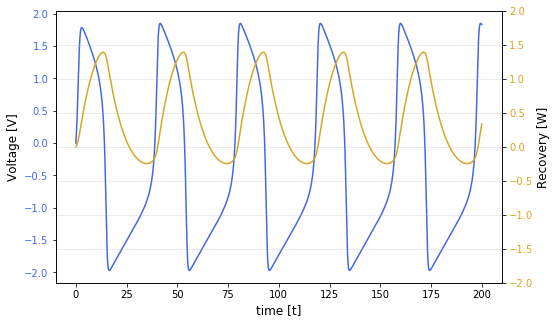

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the results
f, ax1 = plt.subplots(figsize=(8, 5))

# Plot the potential
ax1.plot(model.tvec, model.V, color='royalblue')
ax1.set_xlabel('time [t]', fontsize=12)
ax1.set_ylabel('Voltage [V]', fontsize=12)
ax1.tick_params(axis='y', labelcolor='royalblue')

# Plot the recovery
ax2 = ax1.twinx()
ax2.plot(model.tvec, model.W, color='goldenrod')
ax2.set_ylabel('Recovery [W]', fontsize=12)

# Within potential limits
ax2.set_ylim([np.floor(min(model.W) - 1), np.ceil(max(model.W))])
ax2.tick_params(axis='y', labelcolor='goldenrod')
plt.grid(alpha=0.3)
plt.show()

We can also plot the phase plane as follows:

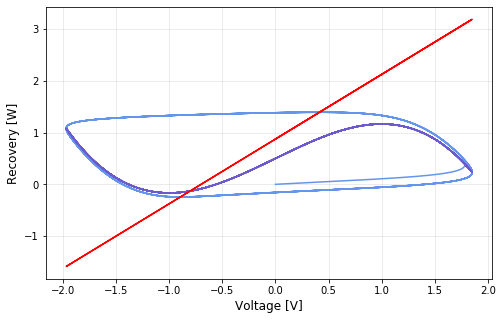

In [3]:
# Plot phase plabe
plt.figure(figsize=(8, 5))
plt.plot(model.V, model.W, color='cornflowerblue')
plt.plot(model.V, model.V - (model.V ** 3) / 3 + model.current, color="slateblue")
plt.plot(model.V, (model.V + model.a) / (model.b), color="red")
plt.xlabel('Voltage [V]', fontsize=12)
plt.ylabel('Recovery [W]', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

The red and purple line represent the nullclines, defined as follows:

<br>
$$
\frac{dV}{dt} = 0 \rightarrow W = V - \frac{V}{3} + I \\
\frac{dW}{dt} = 0 \rightarrow W = \frac{V + a}{b}
$$
<br>

The blue line shows the limit cycle. By changing the parameters of the simulation, we can move the system towards a fixed atractor (accomplished by incrementing $\phi$):


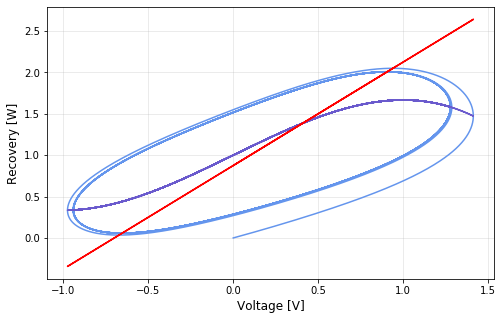

In [4]:
# Change phi
model.phi = 0.8  # Changed by a factor of 10
model.run()

# Plot phase plane
plt.figure(figsize=(8, 5))
plt.plot(model.V, model.W, color='cornflowerblue')
plt.plot(model.V, model.V - (model.V ** 3) / 3 + model.current, color="slateblue")
plt.plot(model.V, (model.V + model.a) / (model.b), color="red")
plt.xlabel('Voltage [V]', fontsize=12)
plt.ylabel('Recovery [W]', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# References

## Bibliography
1. [Impulses and Physiological States in Theoretical Models of Nerve Membrane](https://www.sciencedirect.com/science/article/pii/S0006349561869026)

## Other resources
[FitzHugh-Nagumo model on Scholarpedia](http://scholarpedia.org/article/FitzHugh-Nagumo_model)  
[Nullclines](https://mcb.berkeley.edu/courses/mcb137/exercises/Nullclines.pdf)
